In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
df = pd.read_csv('IMDb Movies India.csv', encoding='iso-8859-1')

In [25]:
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [26]:
df.drop('Name',axis=1,inplace=True)

In [27]:
df.head()

,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [28]:
df.shape

(15509, 9)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Year      14981 non-null  object 
 1   Duration  7240 non-null   object 
 2   Genre     13632 non-null  object 
 3   Rating    7919 non-null   float64
 4   Votes     7920 non-null   object 
 5   Director  14984 non-null  object 
 6   Actor 1   13892 non-null  object 
 7   Actor 2   13125 non-null  object 
 8   Actor 3   12365 non-null  object 
dtypes: float64(1), object(8)
memory usage: 1.1+ MB


In [30]:
df.isnull().sum()

Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [31]:
df.drop_duplicates(inplace=True) 

In [32]:
df.dropna(inplace=True)

In [33]:
df.isnull().sum()

Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

In [34]:
df.describe()

,Rating
count,5659.000000
mean,5.898533
std,1.381165
min,1.100000
25%,5.000000
50%,6.100000
75%,6.900000
max,10.000000


In [35]:
# Data cleaning
df["Year"]=df["Year"].str.strip("()").astype(int)
df["Duration"]=df["Duration"].str.replace(" min","").astype(int)
df["Votes"]=df["Votes"].str.replace(",","").astype(int)

In [36]:
df.dtypes

Year          int32
Duration      int32
Genre        object
Rating      float64
Votes         int32
Director     object
Actor 1      object
Actor 2      object
Actor 3      object
dtype: object

C:\Users\avinash kumar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


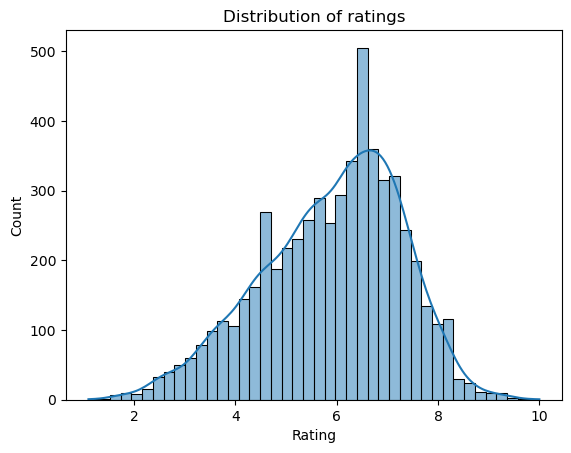

In [37]:
# DATA VISUALISATION
sns.histplot(data=df,x='Rating',kde=True)
plt.title('Distribution of ratings')
plt.show()

C:\Users\avinash kumar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


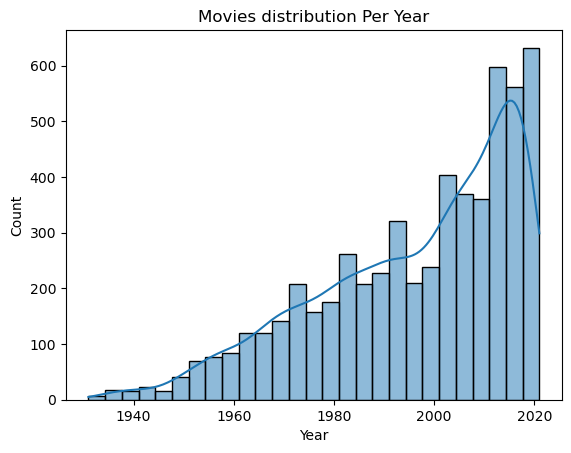

In [39]:
sns.histplot(data=df,x='Year',kde=True)
plt.title('Movies distribution Per Year')
plt.show()

In [40]:
import warnings
warnings.filterwarnings('ignore')

Drama          3796
Action         1686
Romance        1380
Comedy         1344
Crime           875
Thriller        679
Family          416
Musical         412
Mystery         304
Adventure       277
Horror          202
Fantasy         146
Biography       115
History          99
Music            53
Documentary      48
Sport            40
Animation        40
War              33
Sci-Fi           32
News              1
Western           1
Name: count, dtype: int64
Index(['Drama', 'Action', 'Romance', 'Comedy', 'Crime', 'Thriller', 'Family',
       'Musical', 'Mystery', 'Adventure', 'Horror', 'Fantasy', 'Biography',
       'History', 'Music', 'Documentary', 'Sport', 'Animation', 'War',
       'Sci-Fi', 'News', 'Western'],
      dtype='object')
[3796 1686 1380 1344  875  679  416  412  304  277  202  146  115   99
   53   48   40   40   33   32    1    1]


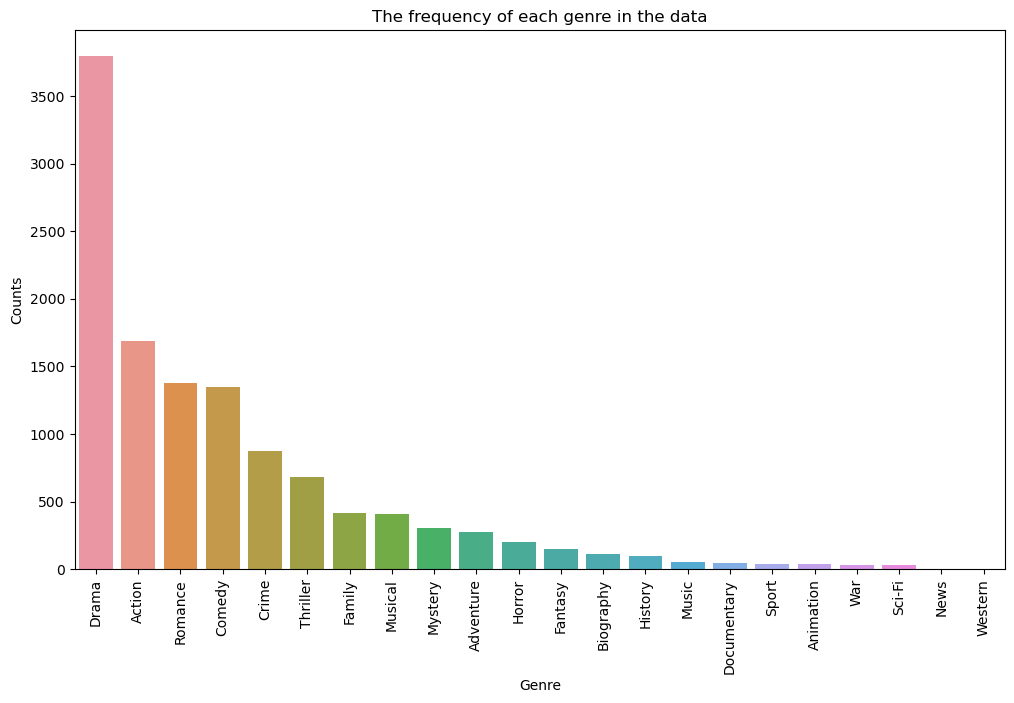

In [41]:
# GENRE VISUALISATION
movies_genre = df['Genre'].str.split(', ',expand=True).stack().value_counts()
labels = movies_genre.keys()
count = movies_genre.values
print(movies_genre)
print(labels)
print(count)
plt.figure(figsize=(12,7))
sns.barplot(x=labels,y=count)
plt.xticks(rotation=90)
plt.title('The frequency of each genre in the data')
plt.xlabel('Genre')
plt.ylabel('Counts')
plt.show()

Text(0.5, 1.0, 'Director with no of movies ')

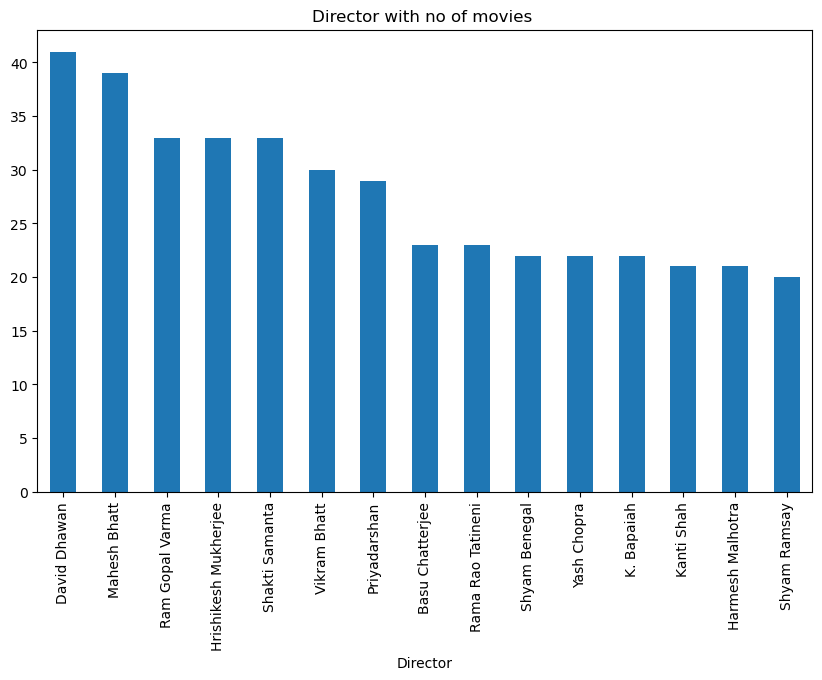

In [48]:
plt.figure(figsize=(10,6))
di=df["Director"].value_counts(ascending=False)[:15].plot(kind="bar")
plt.xticks(rotation=90)
plt.title("Director with no of movies ")

Text(0.5, 1.0, 'Popular Actor ')

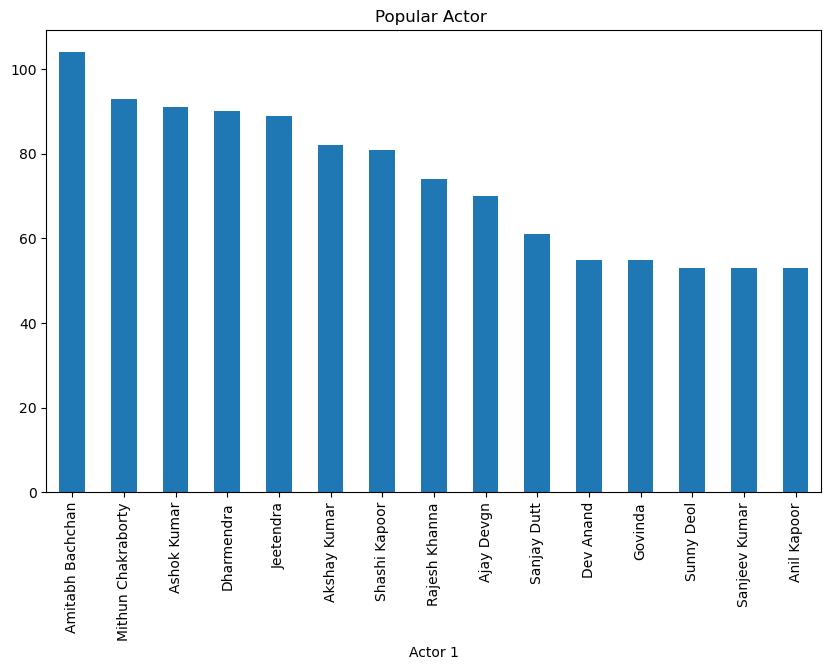

In [50]:
plt.figure(figsize=(10,6))
Ac=df["Actor 1"].value_counts(ascending=False)[:15].plot(kind="bar")

plt.xticks(rotation=90)
plt.title("Popular Actor ")

In [51]:
df.nunique()

Year          91
Duration     174
Genre        376
Rating        83
Votes       2027
Director    2431
Actor 1     1960
Actor 2     2321
Actor 3     2556
dtype: int64

In [52]:
#PERFORMING TARGET ENCODING ncoz NO OF UNIQUE VALUE IS MORE
df['Genre encoded'] = round(df.groupby('Genre')['Rating'].transform('mean'),1)
df['Votes encoded'] = round(df.groupby('Votes')['Rating'].transform('mean'),1)
df['Director encoded'] = round(df.groupby('Director')['Rating'].transform('mean'),1)
df['Actor 1 encoded'] = round(df.groupby('Actor 1')['Rating'].transform('mean'),1)
df['Actor 2 encoded'] = round(df.groupby('Actor 2')['Rating'].transform('mean'),1)
df['Actor 3 encoded'] = round(df.groupby('Actor 3')['Rating'].transform('mean'),1)

df.drop(columns=['Genre','Votes','Director','Actor 1','Actor 2','Actor 3'],inplace=True)
df['Rating'] = round(df['Rating'],1)


In [53]:
df.head()

,Year,Duration,Rating,Genre encoded,Votes encoded,Director encoded,Actor 1 encoded,Actor 2 encoded,Actor 3 encoded
1,2019,109,7.0,6.4,5.6,7.0,6.8,7.0,7.0
3,2019,110,4.4,5.7,5.6,4.4,5.4,4.4,4.4
5,1997,147,4.7,6.2,4.8,5.3,4.8,5.8,5.9
6,2005,142,7.4,6.8,7.4,7.4,5.4,6.9,6.5
8,2012,82,5.6,5.5,6.6,5.6,5.6,5.9,5.6


In [58]:
corre_matrix=df.corr()
corre_matrix

,Year,Duration,Rating,Genre encoded,Votes encoded,Director encoded,Actor 1 encoded,Actor 2 encoded,Actor 3 encoded
Year,1.000000,-0.327567,-0.204642,-0.106299,-0.065378,-0.193998,-0.209719,-0.227672,-0.206574
Duration,-0.327567,1.000000,0.001839,-0.054897,0.051277,-0.024707,-0.039193,-0.049581,-0.045045
Rating,-0.204642,0.001839,1.000000,0.429604,0.643433,0.809482,0.750750,0.767801,0.776066
Genre encoded,-0.106299,-0.054897,0.429604,1.000000,0.236476,0.410402,0.375575,0.390088,0.373209
Votes encoded,-0.065378,0.051277,0.643433,0.236476,1.000000,0.451332,0.369784,0.406287,0.428439
Director encoded,-0.193998,-0.024707,0.809482,0.410402,0.451332,1.000000,0.715179,0.714340,0.708390
Actor 1 encoded,-0.209719,-0.039193,0.750750,0.375575,0.369784,0.715179,1.000000,0.712704,0.688491
Actor 2 encoded,-0.227672,-0.049581,0.767801,0.390088,0.406287,0.714340,0.712704,1.000000,0.704286
Actor 3 encoded,-0.206574,-0.045045,0.776066,0.373209,0.428439,0.708390,0.688491,0.704286,1.000000


In [61]:
#WE CAN DROP DURATION AS ITS CORRELATION WITH RATING IS ALMOST 0
df.drop("Duration",axis=1,inplace=True)

In [62]:
x=df.drop("Rating",axis=1)
y=df["Rating"]

In [64]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [65]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model=LinearRegression().fit(x_train,y_train)
y_pred=model.predict(x_test)

In [66]:
mse=mean_squared_error(y_test,y_pred)
from sklearn.metrics import r2_score
r2_score=r2_score(y_test,y_pred)

print("MSE FOR LR")
print(mse)
print("R2_SCORE FOR LR")
print(r2_score)

MSE FOR LR
0.3142014162213455
R2_SCORE FOR LR
0.830321320730436


In [67]:
from sklearn.tree import DecisionTreeRegressor
DT=DecisionTreeRegressor()
model=DT.fit(x_train,y_train)
y_pred=model.predict(x_test)

mse=mean_squared_error(y_test,y_pred)
from sklearn.metrics import r2_score
r2_score=r2_score(y_test,y_pred)

print("MSE FOR DTR")
print(mse)
print("R2_SCORE FOR DTR")
print(r2_score)

MSE FOR DTR
0.5020053003533569
R2_SCORE FOR DTR
0.7289012972167129


In [68]:
from sklearn.ensemble import RandomForestRegressor
RFR=RandomForestRegressor()
model=RFR.fit(x_train,y_train)
y_pred=model.predict(x_test)

mse=mean_squared_error(y_test,y_pred)
from sklearn.metrics import r2_score
r2_score=r2_score(y_test,y_pred)

print("MSE FOR RFR")
print(mse)
print("R2_SCORE FOR RFR")
print(r2_score)

MSE FOR RFR
0.2562831934628975
R2_SCORE FOR RFR
0.8615989886081985
